# Libraries

In [1]:
import numpy as np
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import optim
import numpy as np

# Generator

In [3]:
def generator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True)
    )

In [4]:
class Generator(nn.Module):
    def __init__(self, noise_dim, hidden_dim, image_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            generator_block(noise_dim, hidden_dim),
            generator_block(hidden_dim, 2*hidden_dim),
            generator_block(2*hidden_dim, 4*hidden_dim),
            generator_block(4*hidden_dim, 8*hidden_dim),
            nn.Linear(8*hidden_dim, image_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator

In [5]:
def discriminator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LeakyReLU(negative_slope=0.2)
    )

In [6]:
class Discriminator(nn.Module):
    def __init__(self, image_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            discriminator_block(image_dim, 4*hidden_dim),
            discriminator_block(4*hidden_dim, 2*hidden_dim),
            discriminator_block(2*hidden_dim, hidden_dim),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.model(x)

# All together

### Calculate Discriminator and Generator Losses

In [7]:
def get_loss_dis(model_gen, model_dis,
                 real_image,
                 num_images, noise_dim,
                 criterion,
                 device):

    # some fake images will generate by Generator
    x_hat = model_gen(get_noise(num_images, noise_dim, device=device))

    # Discriminator determine how fake images are Fake (With Fake images)
    y_hat_fake = model_dis(x_hat)
    loss_fake = criterion(y_hat_fake, torch.zeros_like(y_hat_fake))

    # Discriminator determine how real images are Realistic (With Real images)
    y_hat_real = model_dis(torch.flatten(real_image, start_dim=1))
    loss_real = criterion(y_hat_real, torch.ones_like(y_hat_real))

    # Weighted Average
    loss_dis = (real_image.shape[0] * loss_real + num_images * loss_fake) / (real_image.shape[0] + num_images)

    return loss_dis

In [8]:
def get_loss_gen(model_gen, model_dis,
                 num_images, noise_dim,
                 criterion,
                 device):

    # some fake images will generate by Generator
    x_hat = model_gen(get_noise(num_images, noise_dim, device=device))

    # Discriminator determine how fake images are Fake (With Fake images)
    y_hat_fake = model_dis(x_hat)
    loss_gen = criterion(y_hat_fake, torch.ones_like(y_hat_fake))

    return loss_gen

### Helper functions

In [9]:
def save_model(model_gen, model_dis, epoch, root):
    filename = root + f'\model_epoch_{epoch}.pt'
    torch.save({'epoch' : epoch,
                'model_dis_state_dict' : model_dis.state_dict(),
                'model_gen_state_dict' : model_gen.state_dict()},
               filename)

In [10]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

### Hyper parameters

In [11]:
# hyper parameter
hidden_dim = 128
noise_dim=64
image_dim=28*28
batch_size=128
lr=0.00001
epochs=200
num_images = 10
disp_freq=100


root_ds='D:\GitHub\gan-lab\Dataset'
root_models = "D:\GitHub\gan-lab\Models"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Data

In [12]:
dataloader = DataLoader(
    MNIST(root_ds, download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

In [13]:
def get_noise(n_samples, noise_dim, device='cpu'):
    return torch.randn(n_samples, noise_dim, device=device)

### Get instance from Dis/Gen classes & criterion & Optimizers

In [14]:
# get instance from models
model_dis = Discriminator(image_dim, hidden_dim).to(device)
model_gen = Generator(noise_dim, hidden_dim, image_dim).to(device)

# Loss function
criterion=nn.BCEWithLogitsLoss()

# Optimizers
optim_dis = optim.Adam(model_dis.parameters(), lr=lr)
optim_gen = optim.Adam(model_gen.parameters(), lr=lr)

### Train GAN

############################################################
###### Epoch 1 #############################################
############################################################
Loss Dis: 0.28	Loss Gen: 0.37


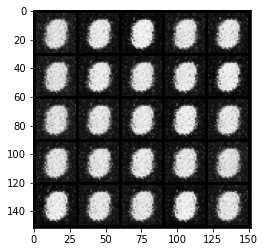

############################################################
###### Epoch 2 #############################################
############################################################
Loss Dis: 0.20	Loss Gen: 0.49


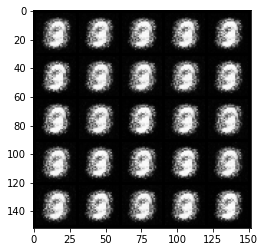

############################################################
###### Epoch 3 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.22


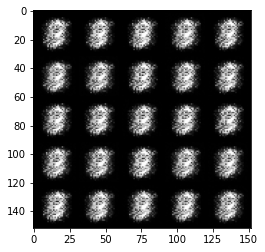

############################################################
###### Epoch 4 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.55


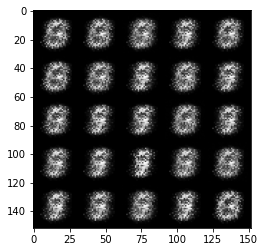

############################################################
###### Epoch 5 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 0.96


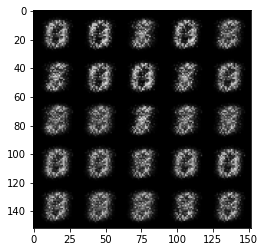

############################################################
###### Epoch 6 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 0.76


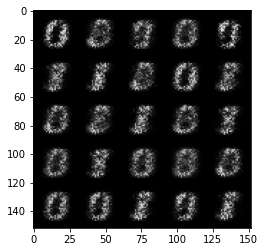

############################################################
###### Epoch 7 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 0.69


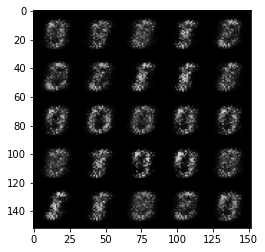

############################################################
###### Epoch 8 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.80


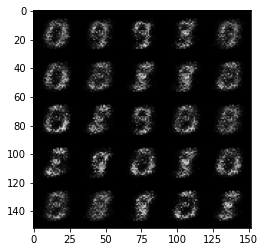

############################################################
###### Epoch 9 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 1.00


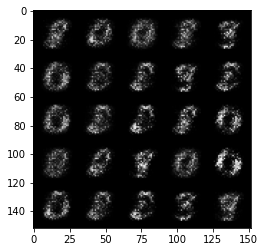

############################################################
###### Epoch 10 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 0.91


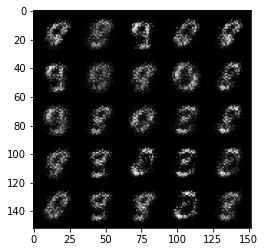

############################################################
###### Epoch 11 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.22


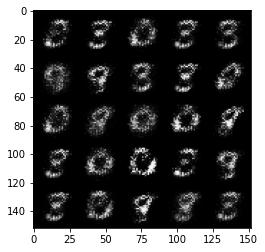

############################################################
###### Epoch 12 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.52


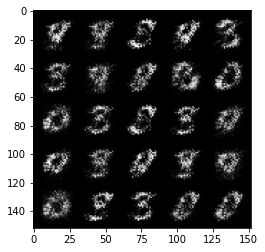

############################################################
###### Epoch 13 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.35


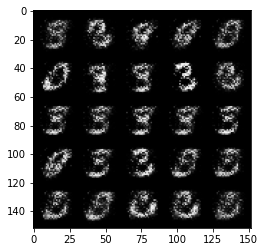

############################################################
###### Epoch 14 #############################################
############################################################
Loss Dis: 0.03	Loss Gen: 1.81


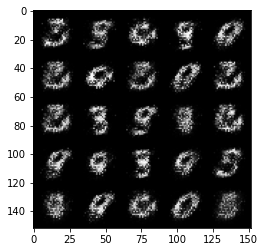

############################################################
###### Epoch 15 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.43


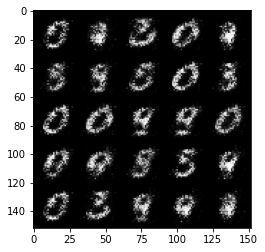

############################################################
###### Epoch 16 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.06


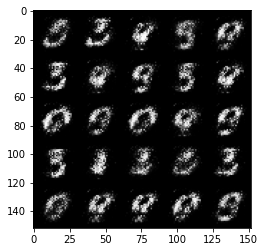

############################################################
###### Epoch 17 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.05


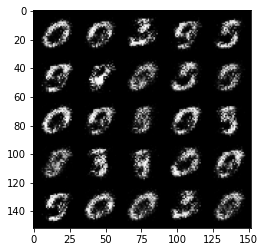

############################################################
###### Epoch 18 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.08


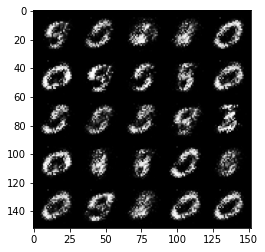

############################################################
###### Epoch 19 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.44


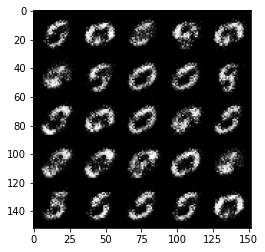

############################################################
###### Epoch 20 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.98


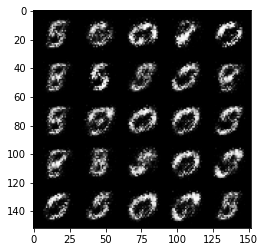

############################################################
###### Epoch 21 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.40


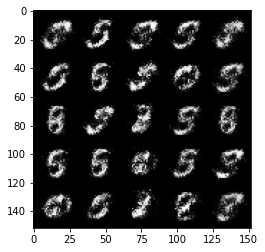

############################################################
###### Epoch 22 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 1.98


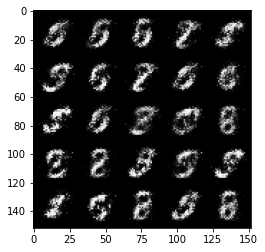

############################################################
###### Epoch 23 #############################################
############################################################
Loss Dis: 0.02	Loss Gen: 2.60


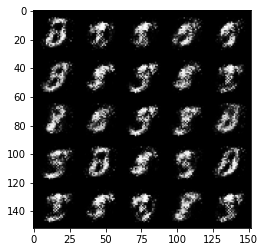

############################################################
###### Epoch 24 #############################################
############################################################
Loss Dis: 0.03	Loss Gen: 2.23


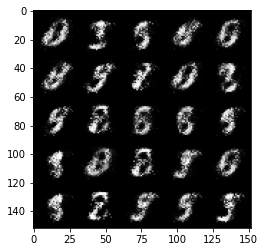

############################################################
###### Epoch 25 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.79


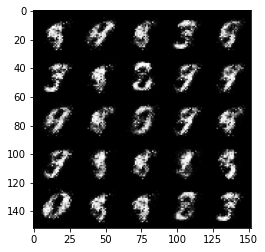

############################################################
###### Epoch 26 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.30


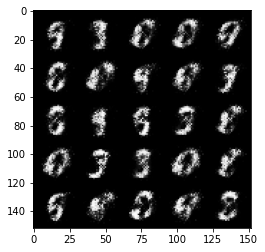

############################################################
###### Epoch 27 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.43


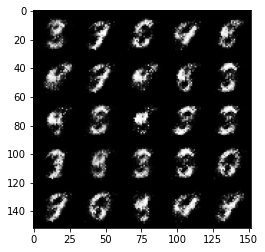

############################################################
###### Epoch 28 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 2.29


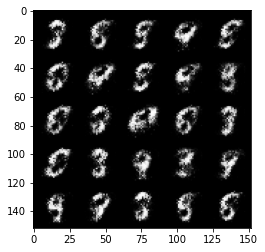

############################################################
###### Epoch 29 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.23


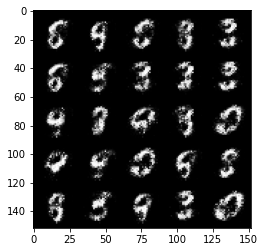

############################################################
###### Epoch 30 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 3.08


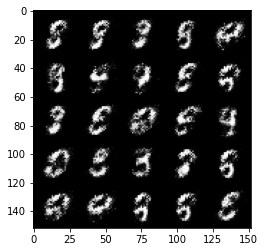

############################################################
###### Epoch 31 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.10


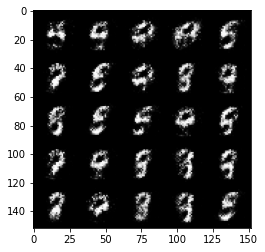

############################################################
###### Epoch 32 #############################################
############################################################
Loss Dis: 0.03	Loss Gen: 2.39


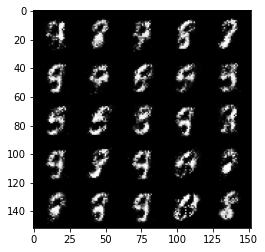

############################################################
###### Epoch 33 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 3.09


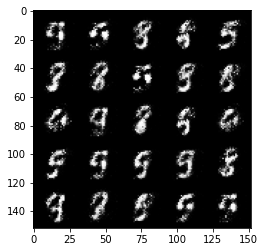

############################################################
###### Epoch 34 #############################################
############################################################
Loss Dis: 0.03	Loss Gen: 2.16


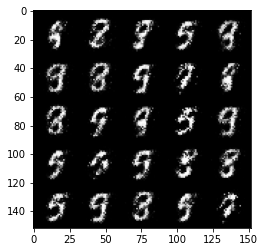

############################################################
###### Epoch 35 #############################################
############################################################
Loss Dis: 0.02	Loss Gen: 1.72


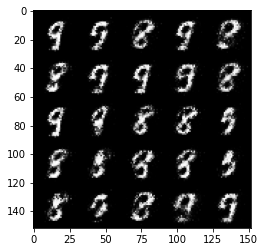

############################################################
###### Epoch 36 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 2.52


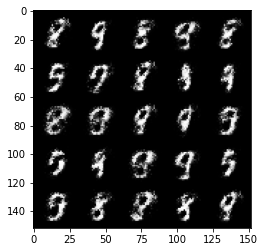

############################################################
###### Epoch 37 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 2.80


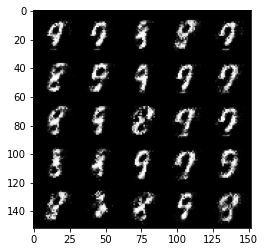

############################################################
###### Epoch 38 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.58


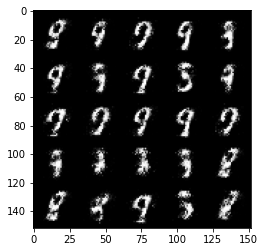

############################################################
###### Epoch 39 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 2.78


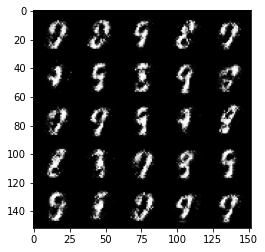

############################################################
###### Epoch 40 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.22


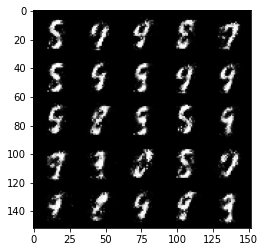

############################################################
###### Epoch 41 #############################################
############################################################
Loss Dis: 0.02	Loss Gen: 2.37


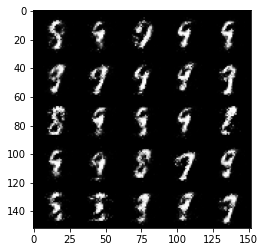

############################################################
###### Epoch 42 #############################################
############################################################
Loss Dis: 0.03	Loss Gen: 2.42


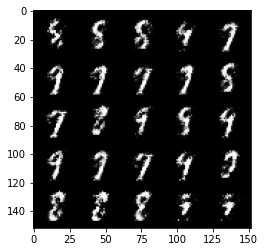

############################################################
###### Epoch 43 #############################################
############################################################
Loss Dis: 0.03	Loss Gen: 2.85


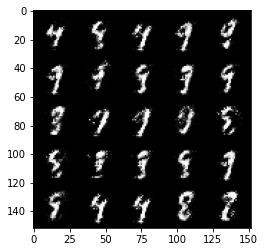

############################################################
###### Epoch 44 #############################################
############################################################
Loss Dis: 0.02	Loss Gen: 2.29


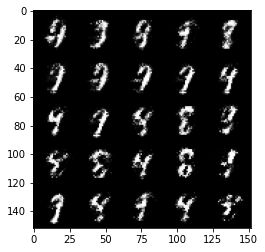

############################################################
###### Epoch 45 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.48


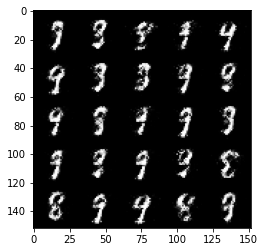

############################################################
###### Epoch 46 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 1.78


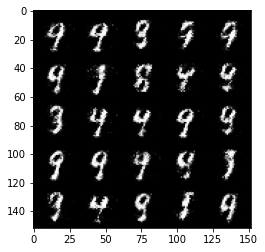

############################################################
###### Epoch 47 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.79


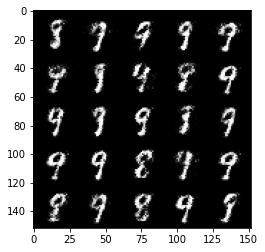

############################################################
###### Epoch 48 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.43


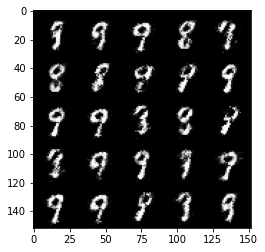

############################################################
###### Epoch 49 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.94


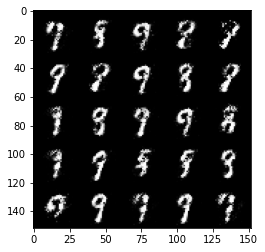

############################################################
###### Epoch 50 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.60


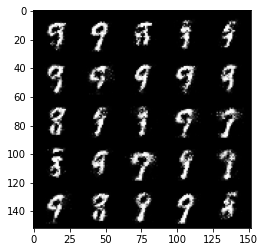

############################################################
###### Epoch 51 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.98


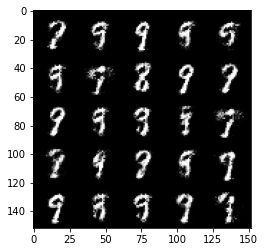

############################################################
###### Epoch 52 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.61


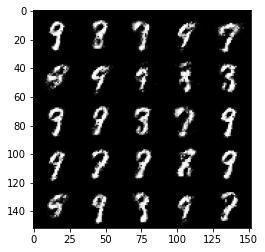

############################################################
###### Epoch 53 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.42


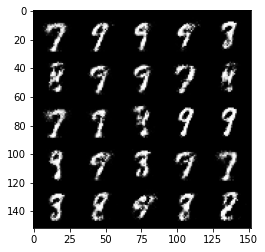

############################################################
###### Epoch 54 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.11


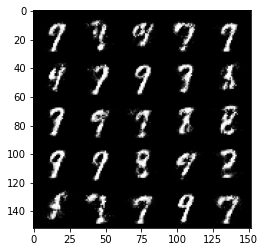

############################################################
###### Epoch 55 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 2.04


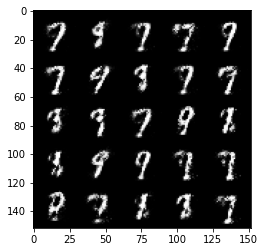

############################################################
###### Epoch 56 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.36


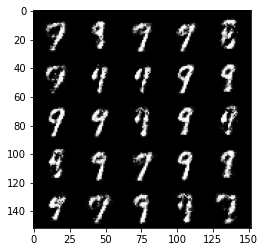

############################################################
###### Epoch 57 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 1.90


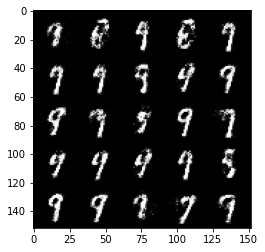

############################################################
###### Epoch 58 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 2.09


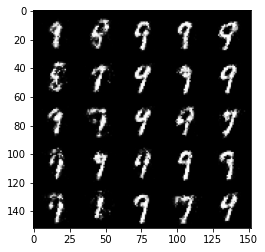

############################################################
###### Epoch 59 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.98


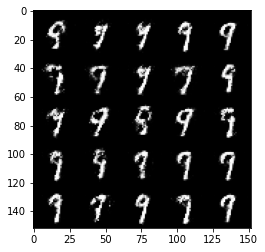

############################################################
###### Epoch 60 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 1.73


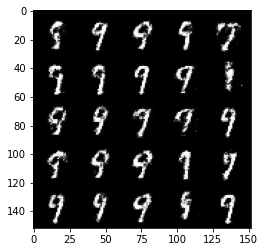

############################################################
###### Epoch 61 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 2.24


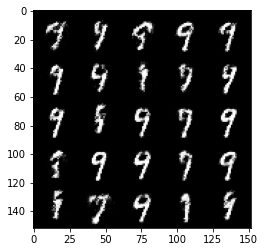

############################################################
###### Epoch 62 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.92


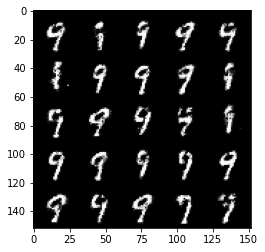

############################################################
###### Epoch 63 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.73


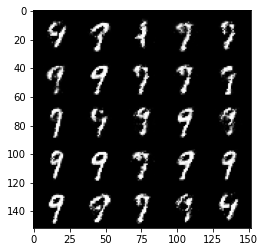

############################################################
###### Epoch 64 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.60


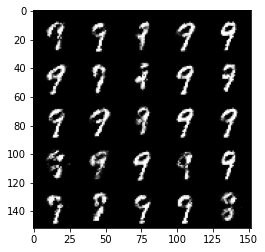

############################################################
###### Epoch 65 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.64


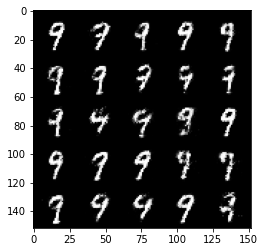

############################################################
###### Epoch 66 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.32


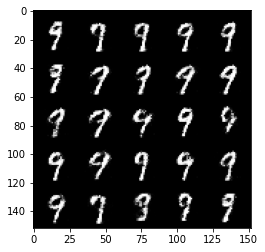

############################################################
###### Epoch 67 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 0.83


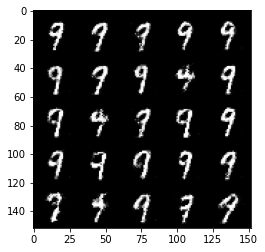

############################################################
###### Epoch 68 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.48


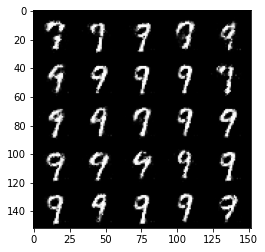

############################################################
###### Epoch 69 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.64


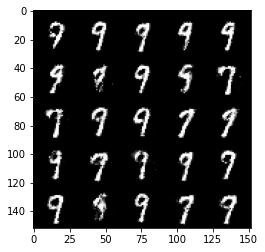

############################################################
###### Epoch 70 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.70


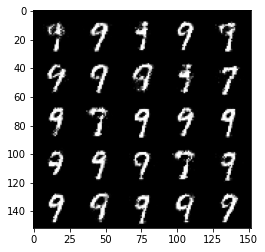

############################################################
###### Epoch 71 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.42


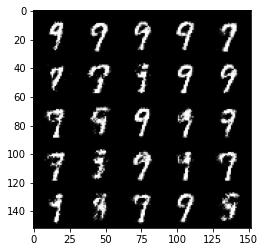

############################################################
###### Epoch 72 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.32


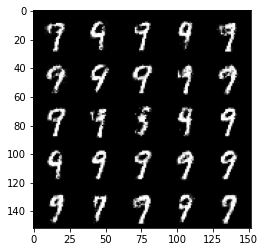

############################################################
###### Epoch 73 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.41


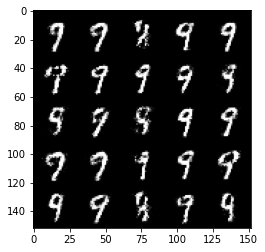

############################################################
###### Epoch 74 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.30


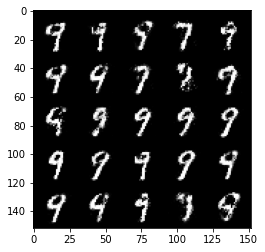

############################################################
###### Epoch 75 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 1.38


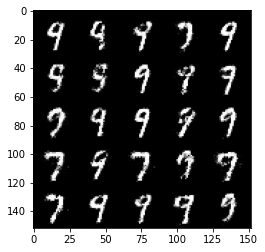

############################################################
###### Epoch 76 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.36


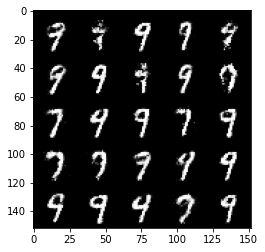

############################################################
###### Epoch 77 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.12


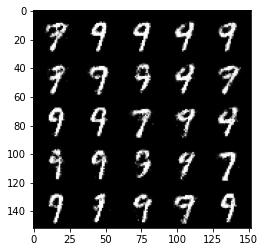

############################################################
###### Epoch 78 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.08


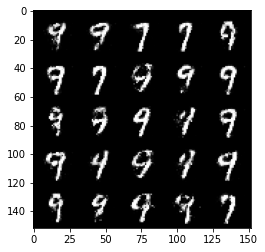

############################################################
###### Epoch 79 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.46


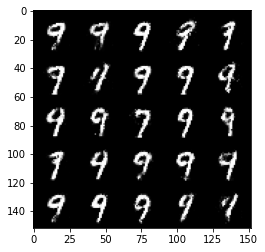

############################################################
###### Epoch 80 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.37


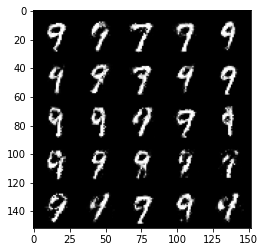

############################################################
###### Epoch 81 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.53


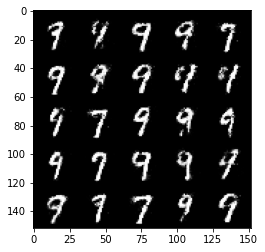

############################################################
###### Epoch 82 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.18


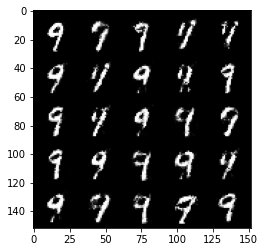

############################################################
###### Epoch 83 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.51


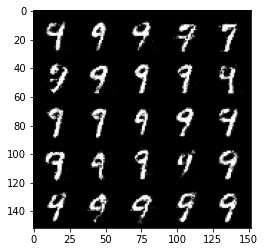

############################################################
###### Epoch 84 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.16


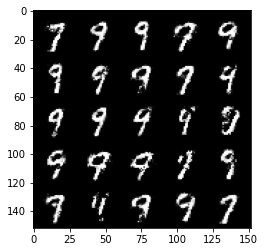

############################################################
###### Epoch 85 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.41


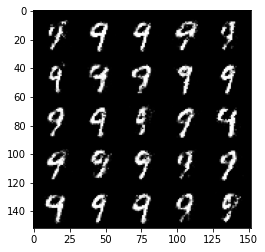

############################################################
###### Epoch 86 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.24


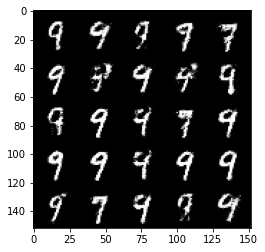

############################################################
###### Epoch 87 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 1.19


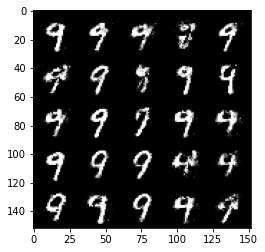

############################################################
###### Epoch 88 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.97


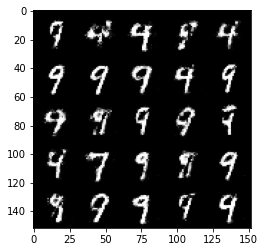

############################################################
###### Epoch 89 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 1.08


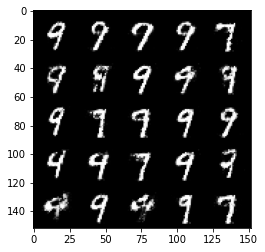

############################################################
###### Epoch 90 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 1.75


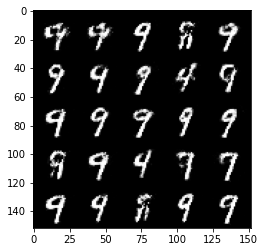

############################################################
###### Epoch 91 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.17


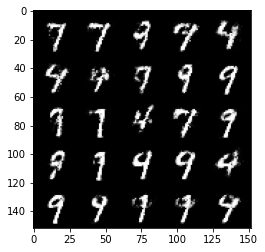

############################################################
###### Epoch 92 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 0.98


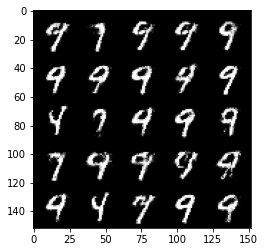

############################################################
###### Epoch 93 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 1.38


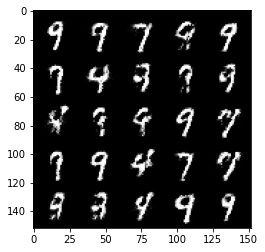

############################################################
###### Epoch 94 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.37


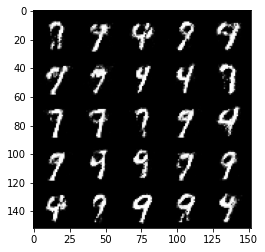

############################################################
###### Epoch 95 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.05


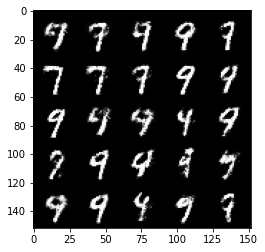

############################################################
###### Epoch 96 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 1.40


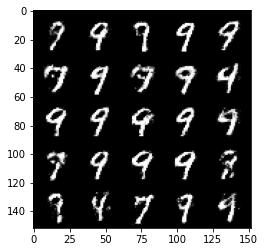

############################################################
###### Epoch 97 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.87


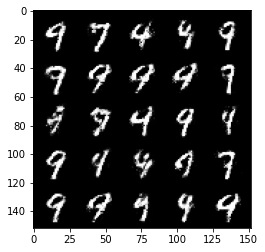

############################################################
###### Epoch 98 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.16


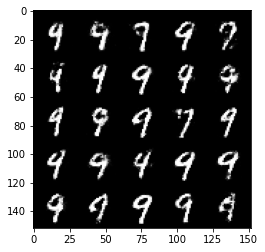

############################################################
###### Epoch 99 #############################################
############################################################
Loss Dis: 0.19	Loss Gen: 1.02


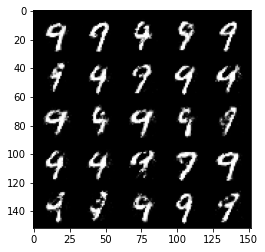

############################################################
###### Epoch 100 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 1.31


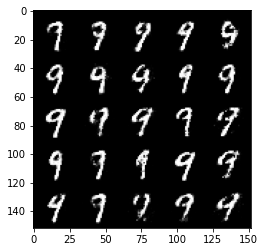

############################################################
###### Epoch 101 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.70


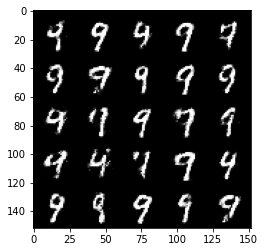

############################################################
###### Epoch 102 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.48


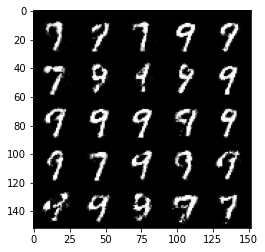

############################################################
###### Epoch 103 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 1.09


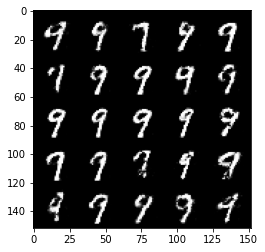

############################################################
###### Epoch 104 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.57


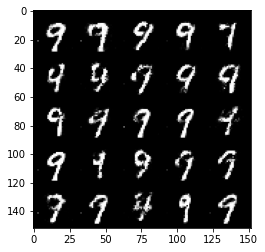

############################################################
###### Epoch 105 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.78


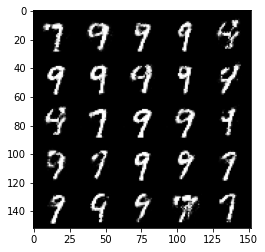

############################################################
###### Epoch 106 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.26


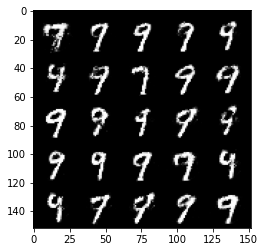

############################################################
###### Epoch 107 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.02


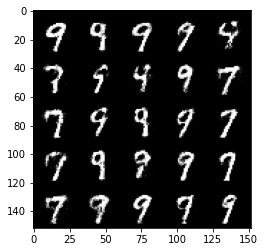

############################################################
###### Epoch 108 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.11


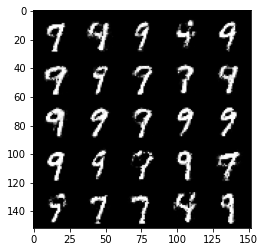

############################################################
###### Epoch 109 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 0.94


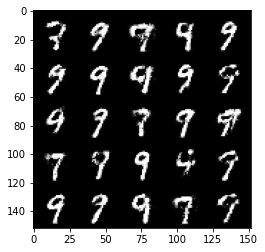

############################################################
###### Epoch 110 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.98


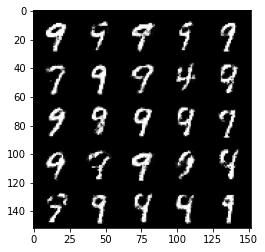

############################################################
###### Epoch 111 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 0.88


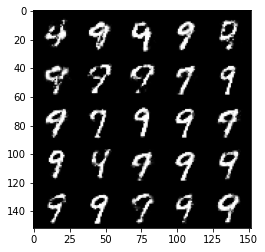

############################################################
###### Epoch 112 #############################################
############################################################
Loss Dis: 0.05	Loss Gen: 1.76


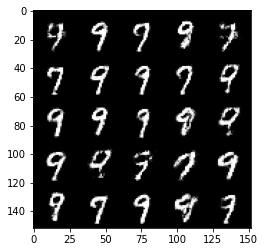

############################################################
###### Epoch 113 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.06


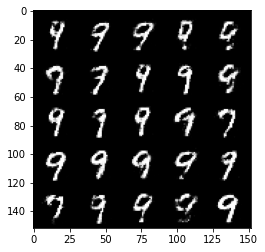

############################################################
###### Epoch 114 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 1.31


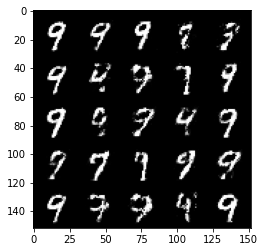

############################################################
###### Epoch 115 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.74


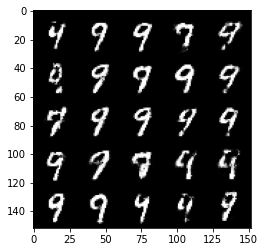

############################################################
###### Epoch 116 #############################################
############################################################
Loss Dis: 0.17	Loss Gen: 0.80


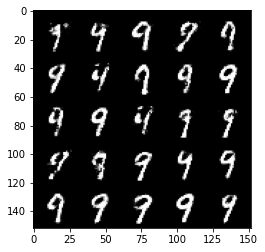

############################################################
###### Epoch 117 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 1.15


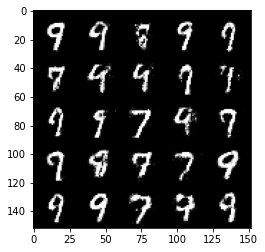

############################################################
###### Epoch 118 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.70


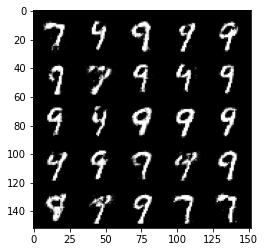

############################################################
###### Epoch 119 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.26


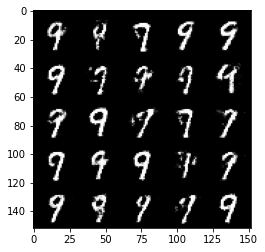

############################################################
###### Epoch 120 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 1.17


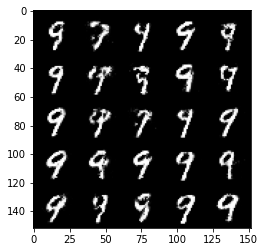

############################################################
###### Epoch 121 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 1.23


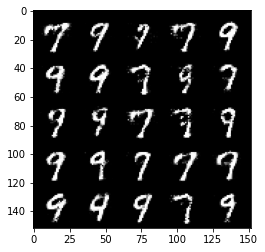

############################################################
###### Epoch 122 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 0.98


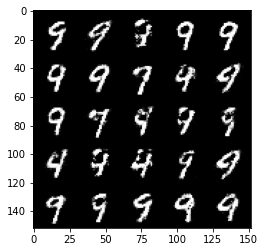

############################################################
###### Epoch 123 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.90


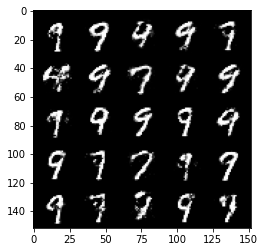

############################################################
###### Epoch 124 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 0.94


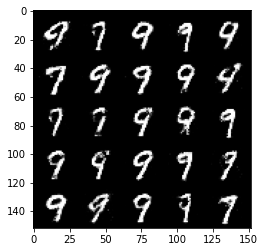

############################################################
###### Epoch 125 #############################################
############################################################
Loss Dis: 0.06	Loss Gen: 1.51


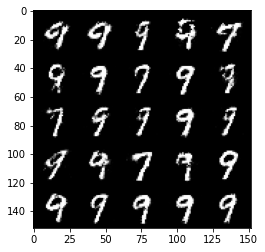

############################################################
###### Epoch 126 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.18


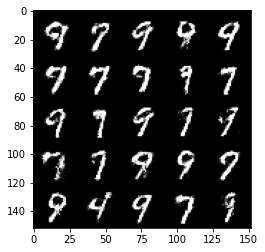

############################################################
###### Epoch 127 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 1.23


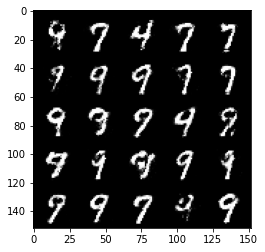

############################################################
###### Epoch 128 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.89


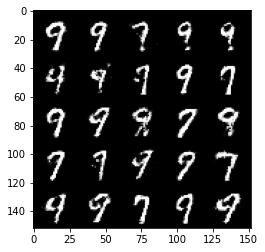

############################################################
###### Epoch 129 #############################################
############################################################
Loss Dis: 0.17	Loss Gen: 0.73


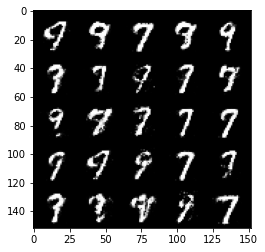

############################################################
###### Epoch 130 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.37


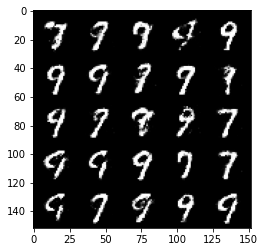

############################################################
###### Epoch 131 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 0.67


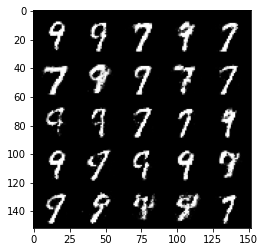

############################################################
###### Epoch 132 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.09


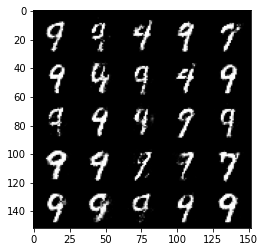

############################################################
###### Epoch 133 #############################################
############################################################
Loss Dis: 0.04	Loss Gen: 1.43


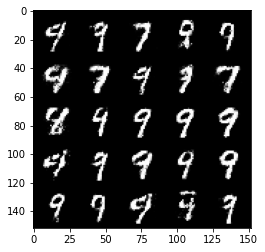

############################################################
###### Epoch 134 #############################################
############################################################
Loss Dis: 0.07	Loss Gen: 0.86


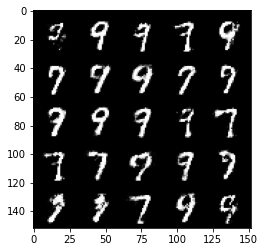

############################################################
###### Epoch 135 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 0.86


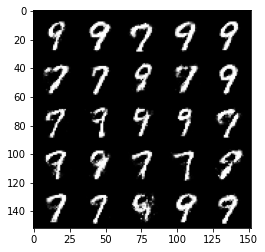

############################################################
###### Epoch 136 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 0.99


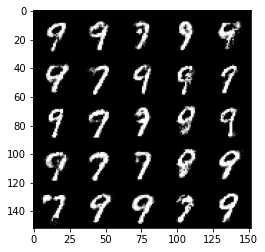

############################################################
###### Epoch 137 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 0.83


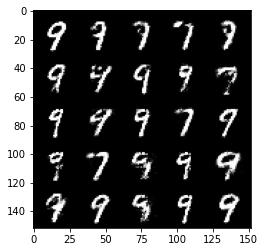

############################################################
###### Epoch 138 #############################################
############################################################
Loss Dis: 0.21	Loss Gen: 0.83


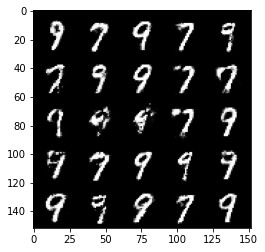

############################################################
###### Epoch 139 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 1.32


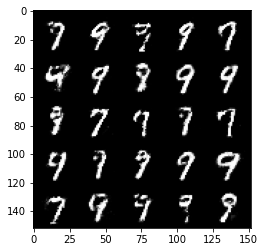

############################################################
###### Epoch 140 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.80


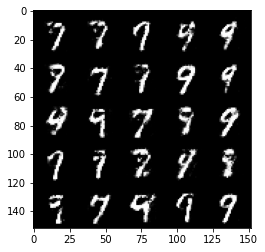

############################################################
###### Epoch 141 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 1.26


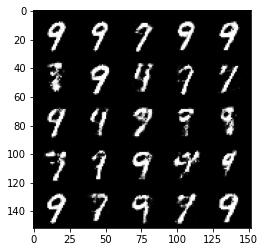

############################################################
###### Epoch 142 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.96


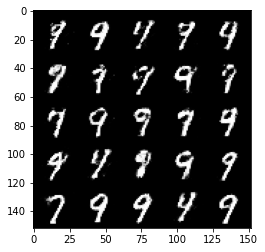

############################################################
###### Epoch 143 #############################################
############################################################
Loss Dis: 0.11	Loss Gen: 0.72


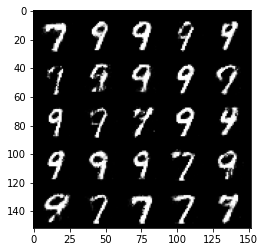

############################################################
###### Epoch 144 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.73


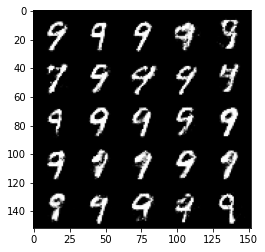

############################################################
###### Epoch 145 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 0.74


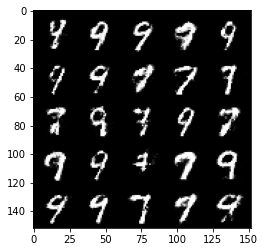

############################################################
###### Epoch 146 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 0.63


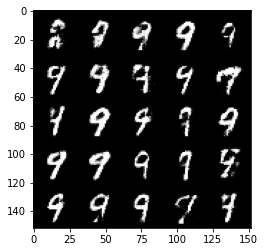

############################################################
###### Epoch 147 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.29


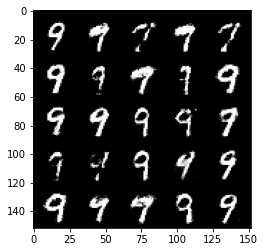

############################################################
###### Epoch 148 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 1.00


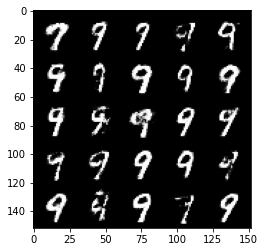

############################################################
###### Epoch 149 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 0.62


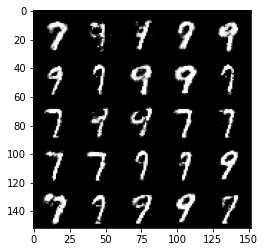

############################################################
###### Epoch 150 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.70


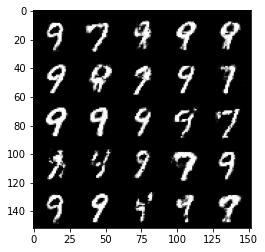

############################################################
###### Epoch 151 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 0.82


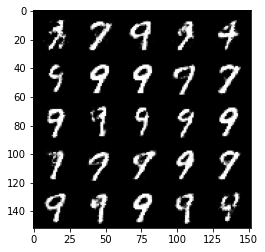

############################################################
###### Epoch 152 #############################################
############################################################
Loss Dis: 0.08	Loss Gen: 1.03


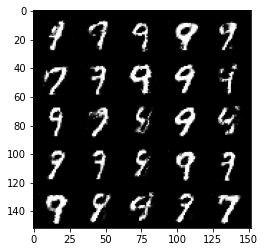

############################################################
###### Epoch 153 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.46


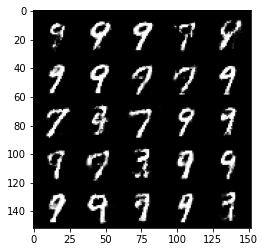

############################################################
###### Epoch 154 #############################################
############################################################
Loss Dis: 0.18	Loss Gen: 1.28


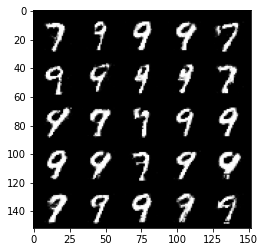

############################################################
###### Epoch 155 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 0.76


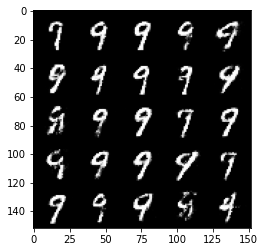

############################################################
###### Epoch 156 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.95


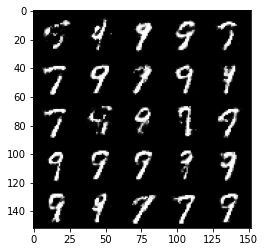

############################################################
###### Epoch 157 #############################################
############################################################
Loss Dis: 0.17	Loss Gen: 0.60


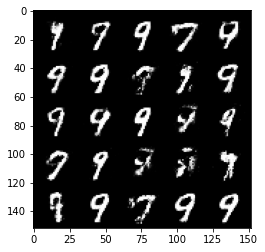

############################################################
###### Epoch 158 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 1.07


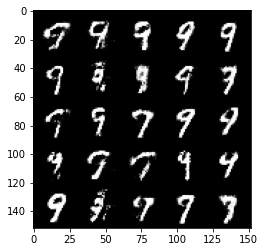

############################################################
###### Epoch 159 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 0.77


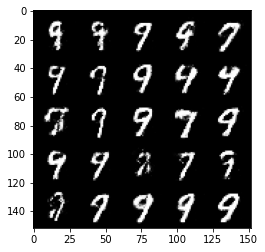

############################################################
###### Epoch 160 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.87


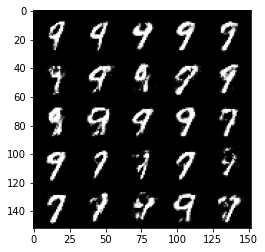

############################################################
###### Epoch 161 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 1.06


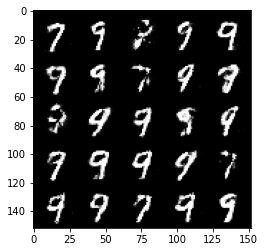

############################################################
###### Epoch 162 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.76


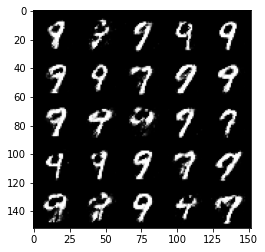

############################################################
###### Epoch 163 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.77


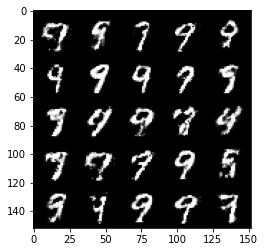

############################################################
###### Epoch 164 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.94


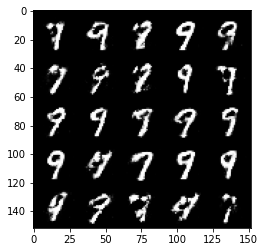

############################################################
###### Epoch 165 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.78


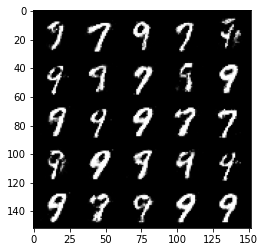

############################################################
###### Epoch 166 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.41


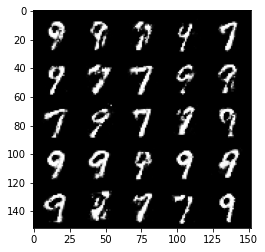

############################################################
###### Epoch 167 #############################################
############################################################
Loss Dis: 0.09	Loss Gen: 0.76


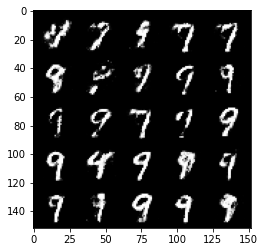

############################################################
###### Epoch 168 #############################################
############################################################
Loss Dis: 0.18	Loss Gen: 0.50


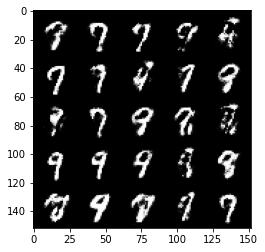

############################################################
###### Epoch 169 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.74


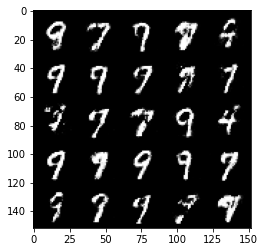

############################################################
###### Epoch 170 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.93


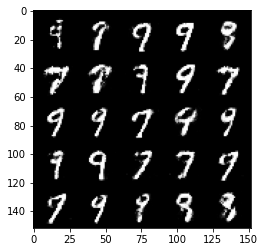

############################################################
###### Epoch 171 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.69


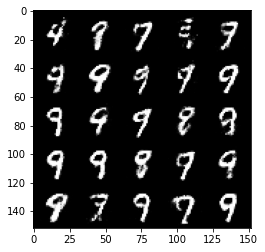

############################################################
###### Epoch 172 #############################################
############################################################
Loss Dis: 0.19	Loss Gen: 0.75


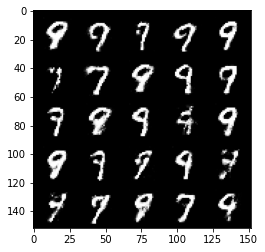

############################################################
###### Epoch 173 #############################################
############################################################
Loss Dis: 0.13	Loss Gen: 0.84


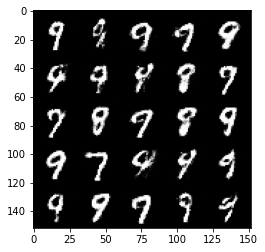

############################################################
###### Epoch 174 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.46


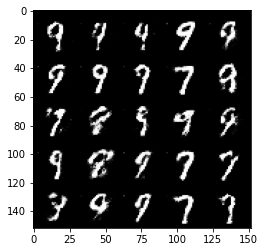

############################################################
###### Epoch 175 #############################################
############################################################
Loss Dis: 0.18	Loss Gen: 0.65


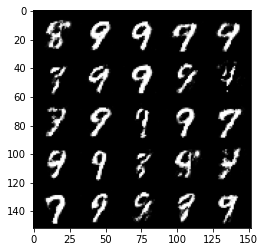

############################################################
###### Epoch 176 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 1.05


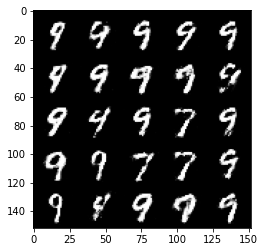

############################################################
###### Epoch 177 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.58


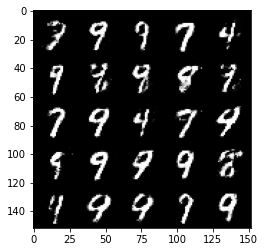

############################################################
###### Epoch 178 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.95


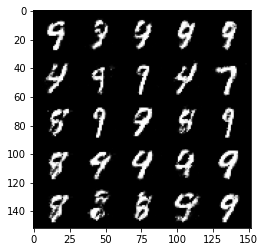

############################################################
###### Epoch 179 #############################################
############################################################
Loss Dis: 0.17	Loss Gen: 0.56


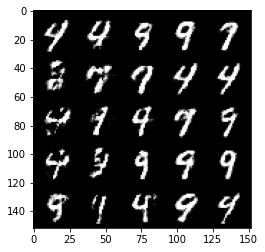

############################################################
###### Epoch 180 #############################################
############################################################
Loss Dis: 0.18	Loss Gen: 1.06


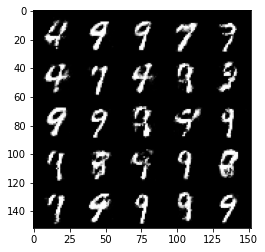

############################################################
###### Epoch 181 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.93


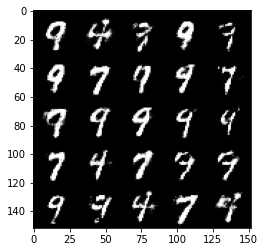

############################################################
###### Epoch 182 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.89


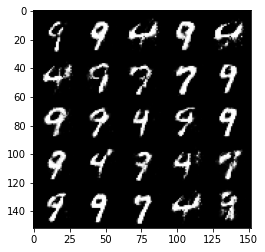

############################################################
###### Epoch 183 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 1.07


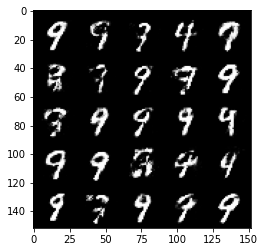

############################################################
###### Epoch 184 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.73


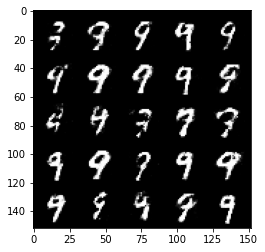

############################################################
###### Epoch 185 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.67


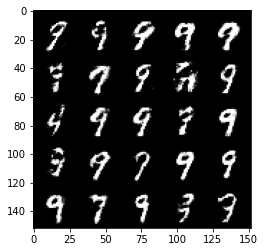

############################################################
###### Epoch 186 #############################################
############################################################
Loss Dis: 0.23	Loss Gen: 0.68


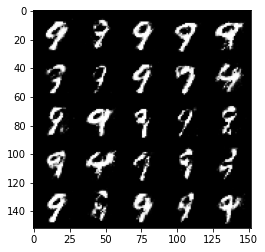

############################################################
###### Epoch 187 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.91


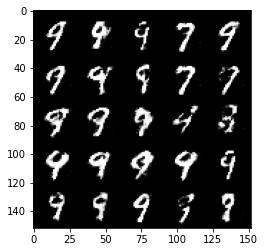

############################################################
###### Epoch 188 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.92


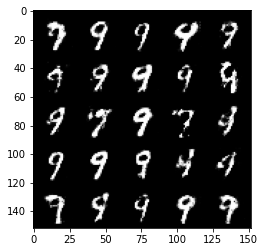

############################################################
###### Epoch 189 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.84


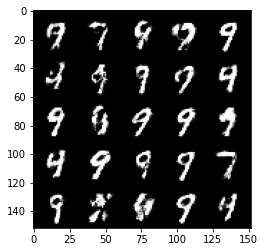

############################################################
###### Epoch 190 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 0.56


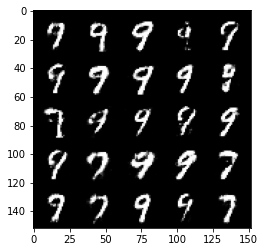

############################################################
###### Epoch 191 #############################################
############################################################
Loss Dis: 0.17	Loss Gen: 0.71


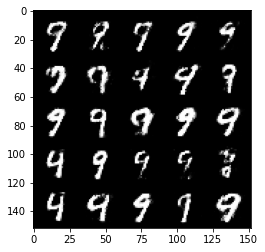

############################################################
###### Epoch 192 #############################################
############################################################
Loss Dis: 0.10	Loss Gen: 0.71


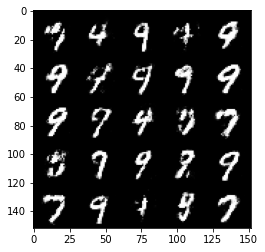

############################################################
###### Epoch 193 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.63


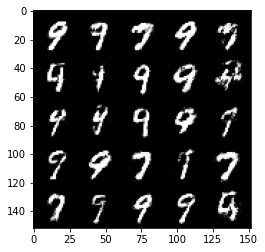

############################################################
###### Epoch 194 #############################################
############################################################
Loss Dis: 0.20	Loss Gen: 0.61


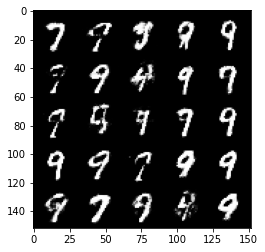

############################################################
###### Epoch 195 #############################################
############################################################
Loss Dis: 0.14	Loss Gen: 0.70


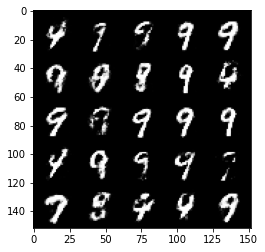

############################################################
###### Epoch 196 #############################################
############################################################
Loss Dis: 0.12	Loss Gen: 0.75


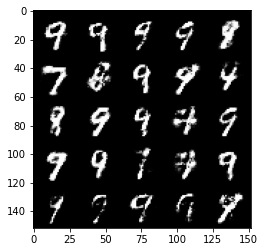

############################################################
###### Epoch 197 #############################################
############################################################
Loss Dis: 0.21	Loss Gen: 0.97


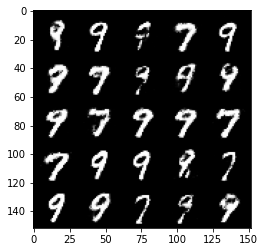

############################################################
###### Epoch 198 #############################################
############################################################
Loss Dis: 0.16	Loss Gen: 0.68


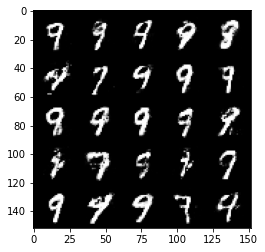

############################################################
###### Epoch 199 #############################################
############################################################
Loss Dis: 0.18	Loss Gen: 0.44


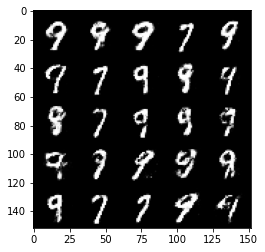

############################################################
###### Epoch 200 #############################################
############################################################
Loss Dis: 0.15	Loss Gen: 0.84


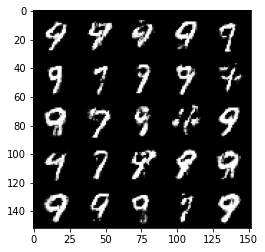

In [15]:
loss_gen_min = np.Inf

for epoch in range(1,epochs+1):
    print(60 * "#")
    print(6 * "#" + " Epoch " + str(epoch) + " " + 45 * "#")
    print(60 * "#")

    # Set mode on "train mode"
    model_gen.train()
    model_dis.train()

    for iter_train, (real_image, _) in enumerate(dataloader,1):
        # GPU (model and data)
        real_image=real_image.to(device)

        # Discriminator Learning
        optim_dis.zero_grad()
        loss_dis = get_loss_dis(model_gen, model_dis, real_image, num_images, noise_dim, criterion, device)
        loss_dis.backward()
        optim_dis.step()

        # Generator Learning
        optim_gen.zero_grad()
        loss_gen = get_loss_gen(model_gen, model_dis, num_images, noise_dim, criterion, device)
        loss_gen.backward()
        optim_gen.step()

    save_model(model_gen, model_dis, epoch, root_models)
    print("Loss Dis: {:.2f}\tLoss Gen: {:.2f}".format(loss_dis,loss_gen))
    model_gen.eval()
    fake_images = model_gen(get_noise(25, noise_dim, device=device)).view(-1,28,28)
    show_tensor_images(fake_images)

# END